# Numerical methods for mixed flow reactor (steady state solution for 1-D advection-dispersion problem)

## Example 11.1 backward difference


In [260]:
import numpy as np
import matplotlib.pyplot as plt

In [261]:
Ac = 10  # m^2
L = 100 # m
U = 100 # m/hr
k = 2.  # hr^-1
E = 2000 # m^2/hr
c0 = 1 # mg/L

In [262]:
Q = U * Ac
V = L * Ac

In [263]:
# Analytical solution, see Example 9.2
def MFR(E, xrange):
    eta = k*E/U**2
    lamb1 = U/(2*E)*(1+np.sqrt(1+4*eta))
    lamb2 = U/(2*E)*(1-np.sqrt(1+4*eta))
    F = U*c0*lamb2*np.exp(lamb2*L)/((U-E*lamb1)*lamb2*np.exp(lamb2*L)-(U-E*lamb2)*lamb1*np.exp(lamb1*L))
    G = U*c0*lamb1*np.exp(lamb1*L)/((U-E*lamb2)*lamb1*np.exp(lamb1*L)-(U-E*lamb1)*lamb2*np.exp(lamb2*L))
    c = F*np.exp(lamb1*xrange) + G*np.exp(lamb2*xrange)
    return c

In [264]:
def backward_difference(n):
    Ep = E*Ac/(L/n) # bulk dispersion coefficient 
    a1 = -Q-Ep
    a2 = Q + Ep + Ep + k*V/n
    a3 = -Ep
    A = np.zeros((n,n))
    W = np.zeros(n)
    # from the second to the last second rows
    for i in range(2,n):
        A[i-1,i-2:i+1] = np.array([a1, a2, a3])
    # inlet boundary condition     
    A[0,:2] = np.array([Q+Ep+k*V/n, a3])
    W[0] = Q * c0
    # oulet boundary condition
    A[-1,-2:] = np.array([a1, Q+Ep+k*V/n])
    
    # calculate concentration at each segment
    c = np.dot((np.linalg.inv(A)), W)
    # find the center of each segment
    x_mid = np.arange(L/n/2,L+L/n/2,L/n)
    return c, x_mid, A

In [265]:
x_analytical = np.linspace(0,L,100)
c_analytical = MFR(E, x_analytical)

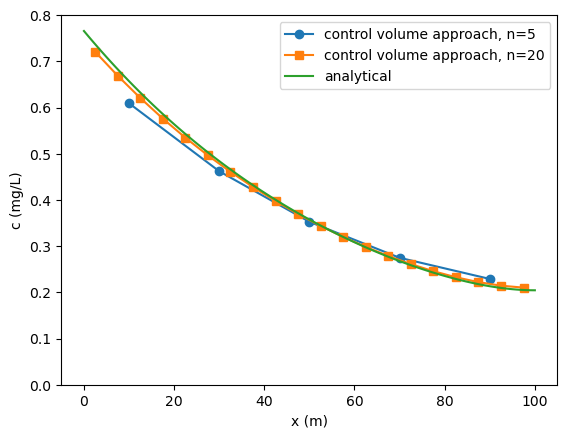

In [266]:
c5, x5, A5 = backward_difference(5)
c20, x20, A20 = backward_difference(20)
plt.plot(x5,c5,'o-',label = 'control volume approach, n=5')
plt.plot(x20,c20,'s-',label = 'control volume approach, n=20')
plt.plot(x_analytical,c_analytical,label='analytical')
plt.xlabel('x (m)')
plt.ylabel('c (mg/L)')
plt.ylim([0,0.8])
plt.legend()

# Example 11.3 Central difference

In [267]:
def central_difference(n):
    Ep = E*Ac/(L/n) # bulk dispersion coefficient 
    a1 = -Q/2-Ep
    a2 =  Ep + Ep + k*V/n
    a3 = -Ep + Q/2
    A = np.zeros((n,n))
    W = np.zeros(n)
    # from the second to the last second rows
    for i in range(2,n):
        A[i-1,i-2:i+1] = np.array([a1, a2, a3])
    # inlet boundary condition     
    A[0,:2] = np.array([Q/2+Ep+k*V/n, a3])
    W[0] = Q * c0
    # oulet boundary condition
    A[-1,-2:] = np.array([a1, Q/2+Ep+k*V/n])
    
    # calculate concentration at each segment
    c = np.dot((np.linalg.inv(A)), W)
    # find the center of each segment
    x_mid = np.arange(L/n/2,L+L/n/2,L/n)
    return c, x_mid

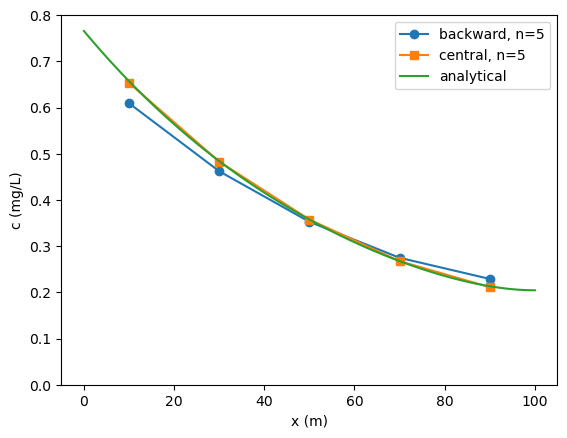

In [268]:
c5_c, x5_c = central_difference(5)

plt.plot(x5,c5,'o-',label = 'backward, n=5')
plt.plot(x5_c,c5_c,'s-',label = 'central, n=5')
plt.plot(x_analytical,c_analytical,label='analytical')
plt.xlabel('x (m)')
plt.ylabel('c (mg/L)')
plt.ylim([0,0.8])
plt.legend()

# EX11.4 Remove numerical dispersion from backward difference 


In [269]:
def BD_remove_numerical_dispersion(n):
    En = (L/n)*U/2. # numerical dispersion
    Em = E - En
    Ep = Em*Ac/(L/n) # bulk dispersion coefficient 
    a1 = -Q-Ep
    a2 = Q + Ep + Ep + k*V/n
    a3 = -Ep
    A = np.zeros((n,n))
    W = np.zeros(n)
    # from the second to the last second rows
    for i in range(2,n):
        A[i-1,i-2:i+1] = np.array([a1, a2, a3])
    # inlet boundary condition     
    A[0,:2] = np.array([Q+Ep+k*V/n, a3])
    W[0] = Q * c0
    # oulet boundary condition
    A[-1,-2:] = np.array([a1, Q+Ep+k*V/n])
    
    # calculate concentration at each segment
    c = np.dot((np.linalg.inv(A)), W)
    # find the center of each segment
    x_mid = np.arange(L/n/2,L+L/n/2,L/n)
    return c, x_mid

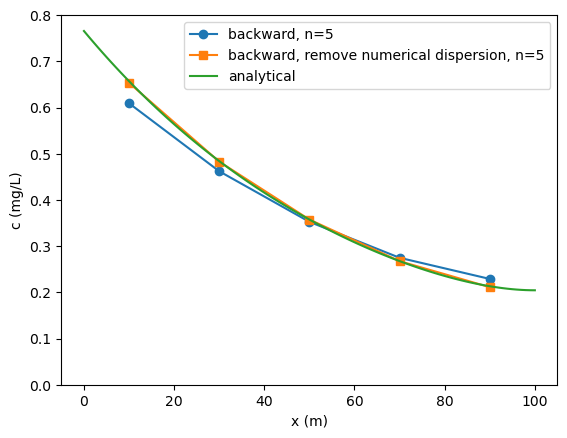

In [270]:
c5_2, x5_2 = BD_remove_numerical_dispersion(5)
plt.plot(x5,c5,'o-',label = 'backward, n=5')
plt.plot(x5_2,c5_2,'s-',label = 'backward, remove numerical dispersion, n=5')
plt.plot(x_analytical,c_analytical,label='analytical')
plt.xlabel('x (m)')
plt.ylabel('c (mg/L)')
plt.ylim([0,0.8])
plt.legend()

## Example 11.5 Negative solution for highly adective systems

Use central difference, increase velocity in the tank to 400 m/hr, set inflow concentration to be 0, a load of 4000 g/hr is added to the middle of the tank.

In [271]:
Ac = 10  # m^2
L = 100 # m
k = 2.  # hr^-1
E = 2000 # m^2/hr
U = 400 # m/hr
Q = U * Ac
V = L * Ac
c0 = 0

def high_advection_example(n):
    Ep = E*Ac/(L/n) # bulk dispersion coefficient 
    a1 = -Q/2-Ep
    a2 =  Ep + Ep + k*V/n
    a3 = -Ep + Q/2
    A = np.zeros((n,n))
    W = np.zeros(n)
    # from the second to the last second rows
    for i in range(2,n):
        A[i-1,i-2:i+1] = np.array([a1, a2, a3])
    # inlet boundary condition     
    A[0,:2] = np.array([Q/2+Ep+k*V/n, a3])
    W[0] = Q * c0
    W[int((n-1)/2)] = 4000 # load in the middle point
    # oulet boundary condition
    A[-1,-2:] = np.array([a1, Q/2+Ep+k*V/n])
    
    # calculate concentration at each segment
    c = np.dot((np.linalg.inv(A)), W)
    # find the center of each segment
    x_mid = np.arange(L/n/2,L+L/n/2,L/n)
    return c, x_mid, A

In [272]:
# Analytical solution, see Equation 9.56 and 9.57
def point_source(E, xrange, point_source_location, loading):
    c = np.zeros(len(xrange))
    eta = k*E/U**2
    term1 = loading/(Q*np.sqrt(1+4*eta))
    c[xrange<=point_source_location] = term1 * np.exp(U/(2*E)*(1+np.sqrt(1+4*eta))*(xrange[xrange<=point_source_location]-point_source_location))
    c[xrange>point_source_location] = term1 * np.exp(U/(2*E)*(1-np.sqrt(1+4*eta))*(xrange[xrange>point_source_location]-point_source_location))
    return c

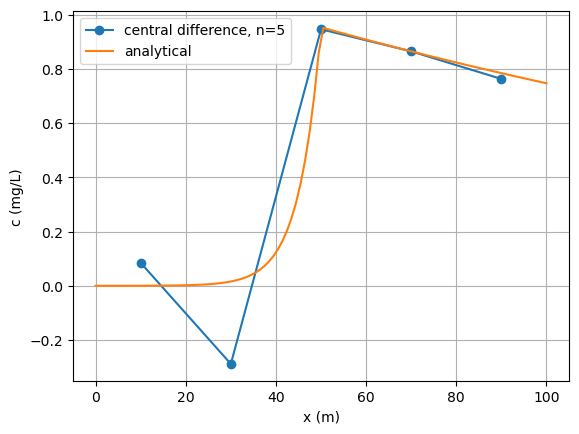

In [273]:
c_5_high_adv, x_5_high_adv, A_5_high_adv = high_advection_example(5)
x_analytical = np.linspace(0,L,100)
c_analytical = point_source(E, x_analytical, L/2, 4000)
plt.plot(x_5_high_adv,c_5_high_adv,'o-',label = 'central difference, n=5')
plt.plot(x_analytical,c_analytical,'-',label = 'analytical')
plt.xlabel('x (m)')
plt.ylabel('c (mg/L)')
# plt.ylim([-0.4,1.2])
plt.grid(True)
plt.legend()

The above figure shows error in predicted concentration using central difference: negative concentration upstream of the loading. We can print out the response matrix to find out what happens. For low advection problem, the off-diagonal terms are all different from the diagonal terms (see A5). However, for high advection problmes, the superdiagonal terms are positive (See A_5_high_adv). This causes the negative concentration in the numerical solution. 

In [276]:
print(A_5_high_adv)

[[ 3400.  1000.     0.     0.     0.]
 [-3000.  2400.  1000.     0.     0.]
 [    0. -3000.  2400.  1000.     0.]
 [    0.     0. -3000.  2400.  1000.]
 [    0.     0.     0. -3000.  3400.]]


In [275]:
print(A5)

[[ 2400. -1000.     0.     0.     0.]
 [-2000.  3400. -1000.     0.     0.]
 [    0. -2000.  3400. -1000.     0.]
 [    0.     0. -2000.  3400. -1000.]
 [    0.     0.     0. -2000.  2400.]]


We show that the positive superdiagnoal terms cause the problem. Therefore, the constant of c_i+1 must be negative. To satisfy this, the cell Peclet number ($Pe = U \Delta x/E$, or cell Reynolds number) must be smaller than 2. In another word, $\Delta x$ must be smaller than $2E/U$.

In [278]:
# for n = 5
Pe = U * (L/5)/E
print('For n = 5, the cell Peclet number is ', Pe)

For n = 5, the cell Peclet number is  4.0


In [279]:
# If we choose n = 10
Pe = U * (L/10)/E
print('For n = 10, the cell Peclet number is ', Pe)

For n = 10, the cell Peclet number is  2.0


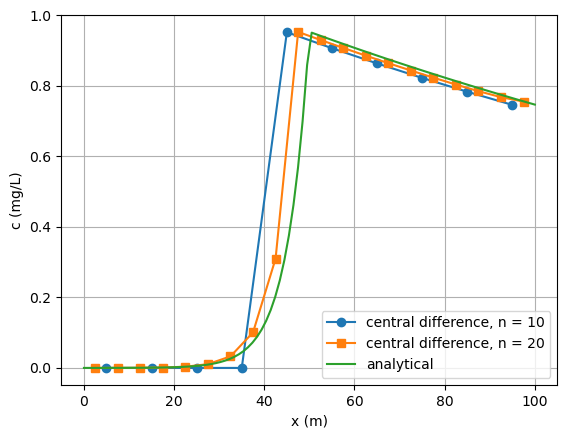

In [282]:
c_10_high_adv, x_10_high_adv, A_10_high_adv = high_advection_example(10)
c_20_high_adv, x_20_high_adv, A_20_high_adv = high_advection_example(20)
x_analytical = np.linspace(0,L,100)
c_analytical = point_source(E, x_analytical, L/2, 4000)
plt.plot(x_10_high_adv,c_10_high_adv,'o-',label = 'central difference, n = 10')
plt.plot(x_20_high_adv,c_20_high_adv,'s-',label = 'central difference, n = 20')
plt.plot(x_analytical,c_analytical,'-',label = 'analytical')
plt.xlabel('x (m)')
plt.ylabel('c (mg/L)')
# plt.ylim([-0.4,1.2])
plt.grid(True)
plt.legend()